## Crawl dữ liệu báo cáo tài chính tự động với Selenium trên trang của Uỷ ban CK https://congbothongtin.ssc.gov.vn/ 


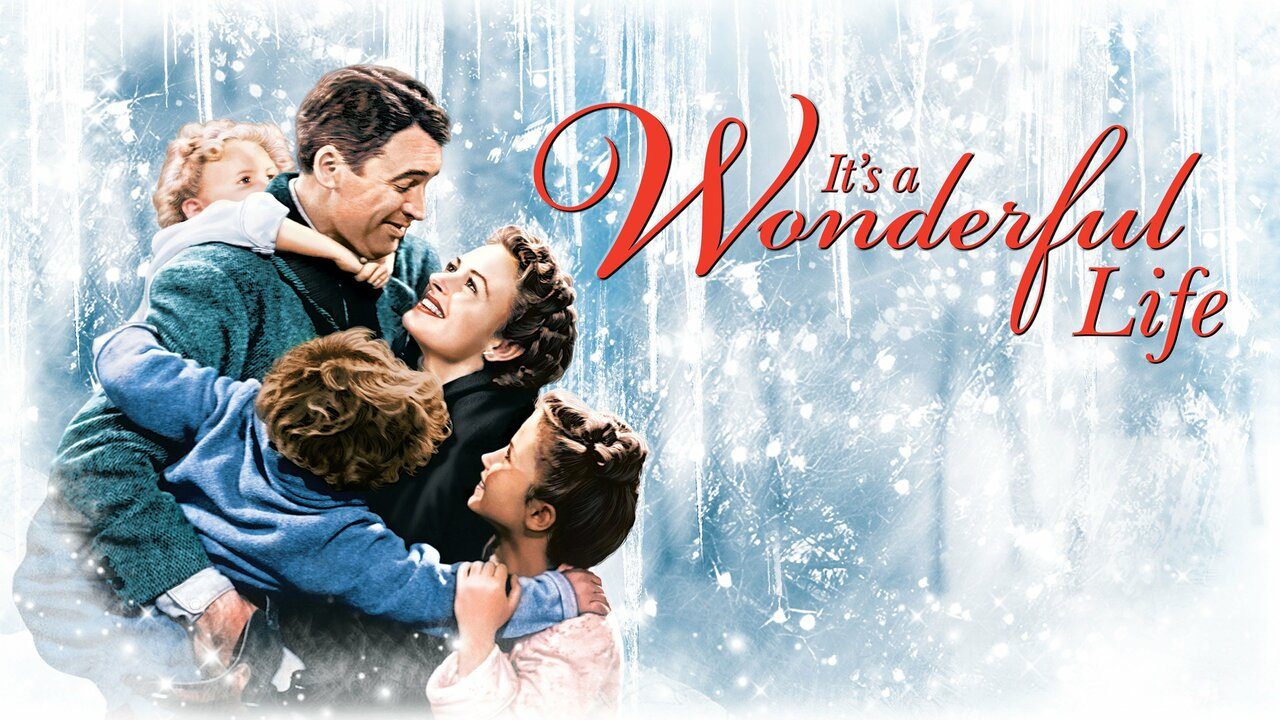
<div class="alert alert-block alert-info" style="margin-top: 20px">
<br> Project :Crawl dữ liệu báo cáo tài chính tự động với Selenium trên trang https://congbothongtin.ssc.gov.vn/ 
<br> Owner: Nguyễn Huy Tuân
<br> Gmail: tuannhbob@gmail.com
<br> Note: 
<br>- Số liệu trên trang của ỦY ban chứng khoán đang hiển thị có cả báo cáo hợp nhất và riêng, nhưng thực chất số liệu của cả 2 báo cáo đều là của báo cáo hợp nhất, nên chỉ kết xuất số liệu báo cáo hợp nhất.
<br> -Máy tính cần cài đặt Python , Google Chorme và Chorme Driver tương ứng với phiên bản google chorme. Các báo cáo trong code đang lấy từ năm 2017 đến năm 2023. Do dữ liệu trên SSC chỉ có từ năm 2017. Các báo cáo đang lấy là báo cáo năm gồm cả hợp nhất và riêng.
<br> -Tùy vào điều kiện mạng từng máy và từng thời điểm, có thể phải thêm vào 1 số thời gian sleep giữa các tác vụ để tránh lỗi trong quá trình xử lý, do máy tính xử lý quá nhanh, trong khi thời gian load page đôi khi phụ thuộc vào tốc độ mạng và do cài đặt của các trang web để hạn chế việc crawl dữ liệu




In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import re
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.by import By


In [2]:
import pandas as pd
import time



In [3]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [4]:
driver =webdriver.Chrome()
url ='https://congbothongtin.ssc.gov.vn/'
driver.get(url)

In [5]:
page_source=BeautifulSoup(driver.page_source)

In [53]:
print('Nhập mã chứng khoán (Viết hoa):')
mack = input()
target=driver.find_element("id", "pt9:it8112::content")
target.clear()
target.send_keys(mack)

target=driver.find_element("id", "pt9:id1::content")
target.clear()
target.send_keys("31/12/2016")

target=driver.find_element("id", "pt9:id2::content")
target.clear()
target.send_keys("31/12/2023")



# MỞ THANH CHỌN 
target=driver.find_element("id", "pt9:smc2::drop")
target.click()

#bc riêng năm
target=driver.find_element(By.XPATH, "/html/body/div[2]/form/div[5]/div[2]/div/div/div/table/tbody/tr/td/ul/li[2]/ul/li[11]/label/input")
# Kiểm tra text box đã được chọn chưa
if target.is_selected():
    TEXT="Đã chọn"
    
else:
    target=driver.find_element(By.XPATH, "/html/body/div[2]/form/div[5]/div[2]/div/div/div/table/tbody/tr/td/ul/li[2]/ul/li[11]/label")
    target.click()

# # bc tổng hợp năm
#     target=driver.find_element(By.XPATH, "/html/body/div/form/div[5]/div[2]/div/div/div/table/tbody/tr/td/ul/li[2]/ul/li[4]/label/input")
#     target.click()
# # bc mẹ năm
#     target=driver.find_element(By.XPATH, "/html/body/div/form/div[5]/div[2]/div/div/div/table/tbody/tr/td/ul/li[2]/ul/li[8]/label/input")
#     target.click() 

# bc hợp nhất
    

target=driver.find_element(By.XPATH, "/html/body/div/form/div[3]/div[2]/div/div[1]/div/div[2]/div/div[1]/div/div/div/div/div[1]/div/table/tbody/tr/td[3]/table/tbody/tr[2]/td[2]/span/div[1]/a/span")
target.click()


Nhập mã chứng khoán (Viết hoa):
PNJ


In [58]:
# Lấy danh sách đường link của các báo cáo 
list=[]
page_source=BeautifulSoup(driver.page_source)
page=BeautifulSoup(driver.page_source)
page_view=page.find_all('a',class_="xgl")
for i in page_view:
    a=i.get('id')
    list.append(a)



#Lấy báo cáo, tùy vào tốc độ mạng, máy chủ, số lượng báo cáo, thời gian chạy sẽ có thời gian khác nhau


In [60]:
# Lấy các báo cáo
start = time.time()
nb=len(list)
dict={}
for n in range(nb):
    
    
#Cập nhật lại list từ đầu tránh tình trạng id thay đổi
    list=[]
    page_source=BeautifulSoup(driver.page_source)
    page=BeautifulSoup(driver.page_source)
    page_view=page.find_all('a',class_="xgl")
    for i in page_view:
        a=i.get('id')
        list.append(a)

    target=driver.find_element("id", list[n])
    target.click()


#Đặc biệt lưu ý ở mục này, nếu mạng yếu phải tăng thời gian time sleep vì có thể tốc độ mạng, không kịp load tốc độ máy tính
#xử lý gây lỗi 

   
    time.sleep(3.5)
    # lấy data frame mới, lấy thông tin của báo cáo 
    df = pd.read_html(driver.page_source)
    tencongty=df[2][1][0]
    tenbaocao=df[3][1][0]
    nambaocao=int(df[3][1][0][-4:])

    # lấy bảng cân đối kế toán
    df = pd.read_html(driver.page_source)
    bs=df[17].rename(columns={0: df[2][1][0]+" "+df[3][1][0][:-9],1:'Mã số',
                           2:"Thuyết minh",
                           3:"31/12/"+str(int(df[3][1][0][-4:])),
                           4:"31/12/"+str(int(df[3][1][0][-4:])-1)  
                          })
    
    
    
    # lấy báo cáo kinh doanh, tùy thuộc vào tốc độ mạng và số lượng các trang báo cáo mà có thể đợi lâu hơn

    
    
    while True:
        
        try:
            wait = WebDriverWait(driver, 200)
            target = wait.until(EC.element_to_be_clickable((By.ID, 'pt2:KQKD::disAcr')))
            target.click()
    
    
    
            target=driver.find_element("xpath","/html/body/div[1]/form/div[2]/div[3]/div/div[1]/div/div[1]/div/div[2]/div/div[1]/div/div[2]/div/div/div/div[2]/div/div[2]/div/div[1]/div[2]/div/div[2]/div[2]/div/div[1]/a" )
            target.click()
            break
        except:
            print("Avicii - Waiting For Love ")
    
    
   
    time.sleep(3)
    df = pd.read_html(driver.page_source)
    fs=df[17].rename(columns={0: df[2][1][0]+" "+df[3][1][0][:-9],1:'Mã số',
                           2:"Thuyết minh",
                           3:"Kỳ này Năm 31/12/"+str(int(df[3][1][0][-4:])),
                           4:"Kỳ này Năm 31/12/"+str(int(df[3][1][0][-4:])-1),
                           
                          })
    # lấy lưu chuyển tt
    target=driver.find_element("id","pt2:LCTT-TT::disAcr" )
    target.click()
    time.sleep(1.5)
    df = pd.read_html(driver.page_source)
    cf_d=df[17].rename(columns={0: df[2][1][0]+" "+df[3][1][0][:-9],1:'Mã số',
                           2:"Thuyết minh",                     
                           3:"Lũy kế từ đầu năm đến cuối kỳ này Năm 31/12/"+str(int(df[3][1][0][-4:])),
                           4:"Lũy kế từ đầu năm đến cuối kỳ này Năm 31/12/"+str(int(df[3][1][0][-4:])-1),
                          })

    # lấy lưu chuyển gián tiếp

    target=driver.find_element("id","pt2:LCTT-GT::disAcr" )
    target.click()
    time.sleep(1.5)
    df = pd.read_html(driver.page_source)
    cf_id=df[17].rename(columns={0: df[2][1][0]+" "+df[3][1][0][:-9],1:'Mã số',
                           2:"Thuyết minh",
                           3:"Lũy kế từ đầu năm đến cuối kỳ này Năm 31/12/"+str(int(df[3][1][0][-4:])),
                           4:"Lũy kế từ đầu năm đến cuối kỳ này Năm 31/12/"+str(int(df[3][1][0][-4:])-1),
                          })
    dict[tenbaocao+"-"+tencongty]=(bs,fs,cf_d,cf_id)
    driver.back()
    time.sleep(2)
end = time.time()
print(end - start)

Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
Avicii - Waiting For Love 
A

Danh sách các báo cáo kết xuất được

In [61]:
for k, v in dict.items():
    print(k)

Báo cáo tài chính hợp nhất năm 2022-CTCP Vàng bạc đá quý Phú Nhuận
Báo cáo tài chính hợp nhất năm 2021-CTCP Vàng bạc đá quý Phú Nhuận
Báo cáo tài chính hợp nhất năm 2020-CTCP Vàng bạc đá quý Phú Nhuận
Báo cáo tài chính Hợp nhất năm 2019-CTCP Vàng bạc đá quý Phú Nhuận
Báo cáo tài chính Hợp nhất năm 2018-CTCP Vàng bạc đá quý Phú Nhuận
Báo cáo tài chính Hợp nhất năm 2017-CTCP Vàng bạc đá quý Phú Nhuận


In [62]:
dict["Báo cáo tài chính hợp nhất năm 2022-CTCP Vàng bạc đá quý Phú Nhuận"][0]

,CTCP Vàng bạc đá quý Phú Nhuận Báo cáo tài chính hợp nhất,Mã số,Thuyết minh,31/12/2022,31/12/2021
0,TÀI SẢN,NaN,NaN,NaN,NaN
1,A- TÀI SẢN NGẮN HẠN,100,NaN,1.196636e+13,9.292192e+12
2,I. Tiền và các khoản tương đương tiền,110,NaN,8.795481e+11,3.554548e+11
3,1. Tiền,111,NaN,8.795481e+11,3.554548e+11
4,2. Các khoản tương đương tiền,112,NaN,0.000000e+00,0.000000e+00
...,...,...,...,...,...
114,13. Lợi ích cổ đông không kiểm soát,429,NaN,0.000000e+00,0.000000e+00
115,II. Nguồn kinh phí và quỹ khác,430,NaN,0.000000e+00,0.000000e+00
116,1. Nguồn kinh phí,431,NaN,0.000000e+00,0.000000e+00
117,2. Nguồn kinh phí đã hình thành TSCĐ,432,NaN,0.000000e+00,0.000000e+00


In [85]:
dict["Báo cáo tài chính Hợp nhất năm 2018-CTCP Vàng bạc đá quý Phú Nhuận"][1]

,CTCP Vàng bạc đá quý Phú Nhuận Báo cáo tài chính Hợp nhất,Mã số,Thuyết minh,Kỳ này Năm 31/12/2018,Kỳ này Năm 31/12/2017,5,6
0,1. Doanh thu bán hàng và cung cấp dịch vụ,1,NaN,14678799605798,11049024104831,NaN,NaN
1,2. Các khoản giảm trừ doanh thu,2,NaN,107663860948,72187214867,NaN,NaN
2,3. Doanh thu thuần về bán hàng và cung cấp dịc...,10,NaN,14571135744850,10976836889964,NaN,NaN
3,4. Giá vốn hàng bán,11,NaN,11792052183391,9064872939048,NaN,NaN
4,5. Lợi nhuận gộp về bán hàng và cung cấp dịch ...,20,NaN,2779083561459,1911963950916,NaN,NaN
5,6. Doanh thu hoạt động tài chính,21,NaN,6846027091,8794872100,NaN,NaN
6,7. Chi phí tài chính,22,NaN,66345864211,56475629564,NaN,NaN
7,- Trong đó: Chi phí lãi vay,23,NaN,61109042390,54981032499,NaN,NaN
8,"8. Phần lãi lỗ trong công ty liên doanh, liên kết",24,NaN,0,0,NaN,NaN
9,9. Chi phí bán hàng,25,NaN,1170069069426,774978169326,NaN,NaN


In [64]:
#Xuất báo cáo ra file excel, báo cáo sẽ được lưu ở thư mục chứa file Python
for k, v in dict.items():
    with pd.ExcelWriter(k+'.xlsx') as writer:  # doctest: +SKIP
        v[0].to_excel(writer, sheet_name='bs',index=False)
        v[1].to_excel(writer, sheet_name='fs',index=False)
        v[2].to_excel(writer, sheet_name='cf_d',index=False)
        v[3].to_excel(writer, sheet_name='cf_id',index=False)